In [67]:
import pandas as pd
data=pd.read_csv('connections.csv')
print(data)
data.info()
data.describe()
data.isnull().sum()
# Clean column names for easier access
df.columns = df.columns.str.strip().str.replace(" ", "_")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

    _id FinancialYear    Country Dataset DatasetQF  NumberOfAdmissions  \
0     1       1997/98  S92000003   Total         d               41460   
1     2       1997/98  S92000003   Total         d                9450   
2     3       1997/98  S92000003   SMR04                         32010   
3     4       1998/99  S92000003   Total         d               41380   
4     5       1998/99  S92000003   Total         d                9830   
..  ...           ...        ...     ...       ...                 ...   
70   71       2020/21  S92000003   Total         d               30120   
71   72       2020/21  S92000003   SMR04                         20130   
72   73       2021/22  S92000003   Total         d               49180   
73   74       2021/22  S92000003   Total         d               30580   
74   75       2021/22  S92000003   SMR04                         18600   

    NumberOfDischarges  NumberOfStays  NumberOfPatients  \
0                41780          38150             28

In [75]:
#clean the dataset 
import pandas as pd
# Load your dataset
df = pd.read_csv("connections.csv")
# Drop irrelevant or non-informative columns (if applicable)
df.drop(columns=['_id', 'id', 'Country', 'DatasetQF'], errors='ignore', inplace=True)
# Keep only rows where 'Dataset' == 'Total' (this filters out duplicates across SMR04/Total)
df = df[df['Dataset'] == 'Total']
# Drop rows with missing or obviously invalid 'FinancialYear'
df = df[df['FinancialYear'].notna()]
# Extract year (e.g., 1997 from "1997/98")
df['Year'] = df['FinancialYear'].str.extract(r'(\d{4})').astype(int)
# Clean numeric columns
cols_to_scale = ['NumberOfAdmissions', 'NumberOfDischarges', 'NumberOfStays',
                 'NumberOfPatients', 'NumberOfHospitalResidents']
# Convert columns to numeric, coercing non-numeric entries to NaN
for col in cols_to_scale:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Drop rows with missing values in numeric columns
df.dropna(subset=cols_to_scale, inplace=True)
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)
# View cleaned data
print(df.head())
print(df.info())


  FinancialYear Dataset  NumberOfAdmissions  NumberOfDischarges  \
0       1997/98   Total               41460               41780   
1       1998/99   Total               41380               41900   
2       1999/00   Total               40850               41270   
3       2000/01   Total               40210               40520   
4       2001/02   Total               39770               40080   

   NumberOfStays  NumberOfPatients  NumberOfHospitalResidents  \
0          38150             28180                     7840.0   
1          38010             28400                     7330.0   
2          37190             28040                     6900.0   
3          36100             27230                     6620.0   
4          35330             26750                     6310.0   

  NumberOfHospitalResidentsQF  Year  
0                              1997  
1                              1998  
2                              1999  
3                              2000  
4               

In [77]:
#🔎 Outlier Detection
# Find years where admissions were 2 std devs above the mean
mean_adm = df_total['NumberOfAdmissions'].mean()
std_adm = df_total['NumberOfAdmissions'].std()
outliers = df_total[df_total['NumberOfAdmissions'] > (mean_adm + 2 * std_adm)]

print("Outlier Years (High Admissions):")
print(outliers[['FinancialYear', 'NumberOfAdmissions']])


Outlier Years (High Admissions):
   FinancialYear  NumberOfAdmissions
66       2019/20               51680


In [14]:
#preprocessing the data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your CSV
df = pd.read_csv('connections.csv')

# View basic info
print(df.info())
df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   _id                          75 non-null     int64 
 1   FinancialYear                75 non-null     object
 2   Country                      75 non-null     object
 3   Dataset                      75 non-null     object
 4   DatasetQF                    75 non-null     object
 5   NumberOfAdmissions           75 non-null     int64 
 6   NumberOfDischarges           75 non-null     int64 
 7   NumberOfStays                75 non-null     int64 
 8   NumberOfPatients             75 non-null     int64 
 9   NumberOfHospitalResidents    75 non-null     object
 10  NumberOfHospitalResidentsQF  75 non-null     object
dtypes: int64(5), object(6)
memory usage: 6.6+ KB
None


,_id,FinancialYear,Country,Dataset,DatasetQF,NumberOfAdmissions,NumberOfDischarges,NumberOfStays,NumberOfPatients,NumberOfHospitalResidents,NumberOfHospitalResidentsQF
0,1,1997/98,S92000003,Total,d,41460,41780,38150,28180,7840,
1,2,1997/98,S92000003,Total,d,9450,9480,8700,7760,,:
2,3,1997/98,S92000003,SMR04,,32010,32300,29450,21530,7840,
3,4,1998/99,S92000003,Total,d,41380,41900,38010,28400,7330,
4,5,1998/99,S92000003,Total,d,9830,9840,8920,7890,,:
...,...,...,...,...,...,...,...,...,...,...,...
70,71,2020/21,S92000003,Total,d,30120,29900,15390,12420,,:
71,72,2020/21,S92000003,SMR04,,20130,19920,15040,12200,2870,
72,73,2021/22,S92000003,Total,d,49180,49690,30520,23570,2750,
73,74,2021/22,S92000003,Total,d,30580,30980,15950,12700,,:


In [81]:
#🔢 2. Normalization (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming df is already loaded
cols_to_scale = ['NumberOfAdmissions', 'NumberOfDischarges', 'NumberOfStays', 'NumberOfPatients', 'NumberOfHospitalResidents']

# Convert columns to numeric (if any strings or dirty data exist)
for col in cols_to_scale:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Coerce invalid entries to NaN

# Drop any rows with NaNs that could have been introduced
df.dropna(subset=cols_to_scale, inplace=True)

# Now apply MinMaxScaler
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df_normalized.head())


  FinancialYear Dataset  NumberOfAdmissions  NumberOfDischarges  \
0       1997/98   Total            0.402688            0.397644   
1       1998/99   Total            0.398013            0.404375   
2       1999/00   Total            0.367037            0.369041   
3       2000/01   Total            0.329632            0.326977   
4       2001/02   Total            0.303916            0.302299   

   NumberOfStays  NumberOfPatients  NumberOfHospitalResidents  \
0       1.000000          0.958491                   1.000000   
1       0.984462          1.000000                   0.901354   
2       0.893452          0.932075                   0.818182   
3       0.772475          0.779245                   0.764023   
4       0.687014          0.688679                   0.704062   

  NumberOfHospitalResidentsQF  Year  
0                              1997  
1                              1998  
2                              1999  
3                              2000  
4               

In [83]:
#📊 3. Standardization (Z-score Scaling)
#This scales features to have mean = 0 and std = 1.
std_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[cols_to_scale] = std_scaler.fit_transform(df[cols_to_scale])

print(df_standardized.head())


  FinancialYear Dataset  NumberOfAdmissions  NumberOfDischarges  \
0       1997/98   Total            0.170104            0.187710   
1       1998/99   Total            0.154162            0.211582   
2       1999/00   Total            0.048544            0.086256   
3       2000/01   Total           -0.078994           -0.062941   
4       2001/02   Total           -0.166677           -0.150471   

   NumberOfStays  NumberOfPatients  NumberOfHospitalResidents  \
0       2.102247          1.883110                   2.159044   
1       2.051527          2.015367                   1.814559   
2       1.754457          1.798946                   1.524111   
3       1.359570          1.311997                   1.334982   
4       1.080613          1.023434                   1.125589   

  NumberOfHospitalResidentsQF  Year  
0                              1997  
1                              1998  
2                              1999  
3                              2000  
4               

In [29]:
#using the agate library for extracting the table from the csv file and calculating the mean ,median and mode
import agate
table = agate.Table.from_csv('connections.csv')  # Replace with your CSV file path
cols_to_analyze = ['NumberOfAdmissions', 'NumberOfDischarges', 'NumberOfStays']
mean_values = {col: table.aggregate(agate.Mean(col)) for col in cols_to_analyze}
print("Mean Values:")
print(mean_values)
median_values = {col: table.aggregate(agate.Median(col)) for col in cols_to_analyze}
print("\nMedian Values:")
print(median_values)
def calculate_mode(col):
    values = [row[col] for row in table.rows]
    return max(set(values), key=values.count)
mode_values = {col: calculate_mode(col) for col in cols_to_analyze}
print("\nMode Values:")
print(mode_values)


Mean Values:
{'NumberOfAdmissions': Decimal('27070.8'), 'NumberOfDischarges': Decimal('27223.73333333333333333333333'), 'NumberOfStays': Decimal('21564.8')}

Median Values:
{'NumberOfAdmissions': Decimal('26030'), 'NumberOfDischarges': Decimal('26340'), 'NumberOfStays': Decimal('19810')}

Mode Values:
{'NumberOfAdmissions': Decimal('21320'), 'NumberOfDischarges': Decimal('36600'), 'NumberOfStays': Decimal('8800')}


   _id FinancialYear    Country Dataset DatasetQF  NumberOfAdmissions  \
0    1       1997/98  S92000003   Total         d               41460   
1    2       1997/98  S92000003   Total         d                9450   
2    3       1997/98  S92000003   SMR04                         32010   
3    4       1998/99  S92000003   Total         d               41380   
4    5       1998/99  S92000003   Total         d                9830   

   NumberOfDischarges  NumberOfStays  NumberOfPatients  \
0               41780          38150             28180   
1                9480           8700              7760   
2               32300          29450             21530   
3               41900          38010             28400   
4                9840           8920              7890   

  NumberOfHospitalResidents NumberOfHospitalResidentsQF  
0                      7840                              
1                                                     :  
2                      7840           

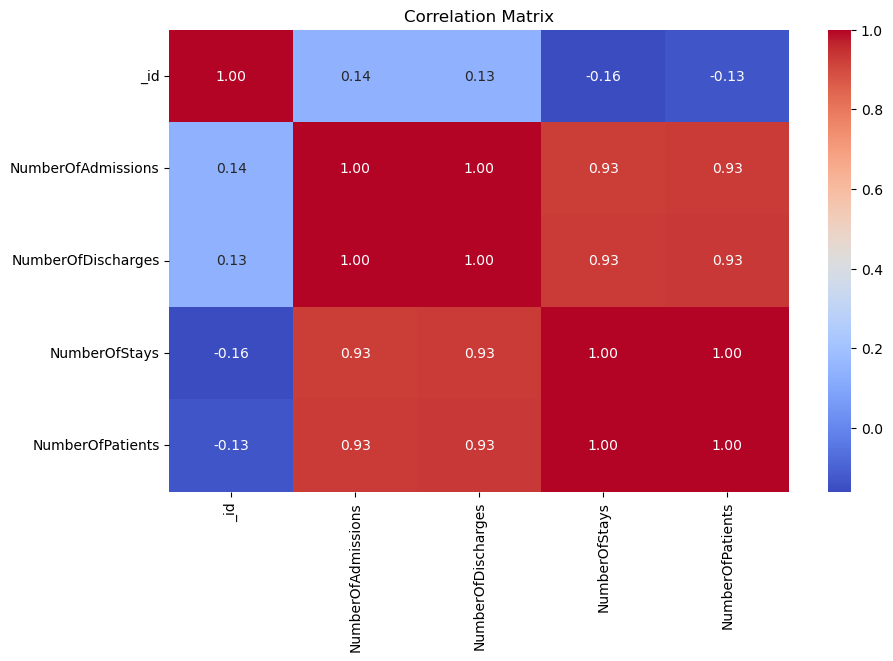

In [37]:
import pandas as pd
df = pd.read_csv("connections.csv")
print(df.head())
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


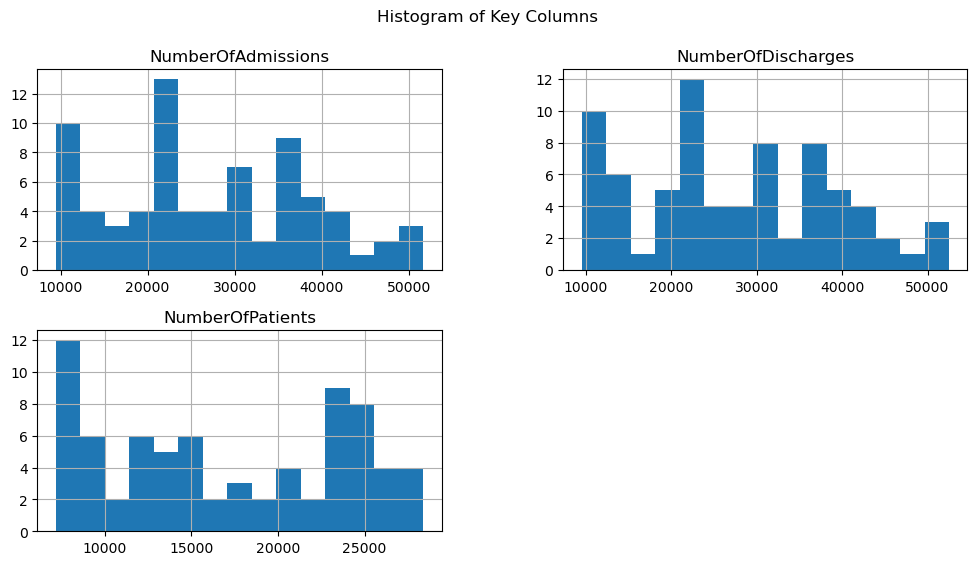

In [41]:
#histogram
df[['NumberOfAdmissions', 'NumberOfDischarges', 'NumberOfPatients']].hist(bins=15, figsize=(12, 6))
plt.suptitle("Histogram of Key Columns")
plt.show()
#🧠 Benefit: Understand the distribution of each feature and spot outliers or skewness.

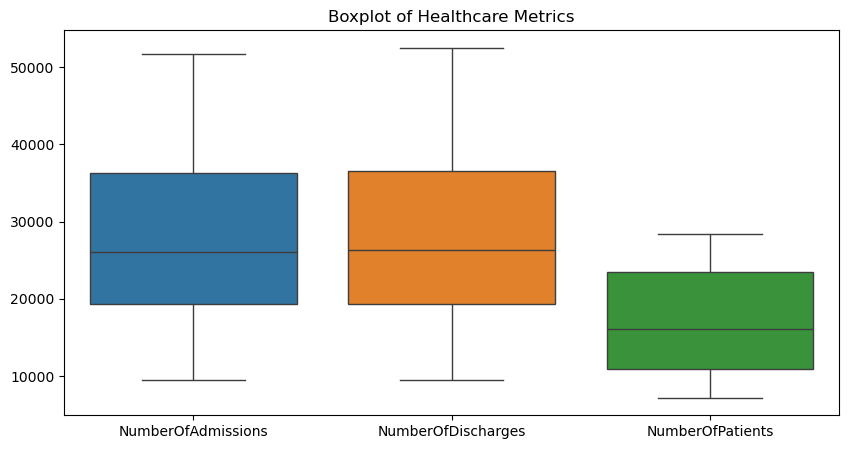

In [12]:
#boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['NumberOfAdmissions', 'NumberOfDischarges', 'NumberOfPatients']])
plt.title("Boxplot of Healthcare Metrics")
plt.show()
#📦 Benefit: Identify potential outliers and spread of the data.

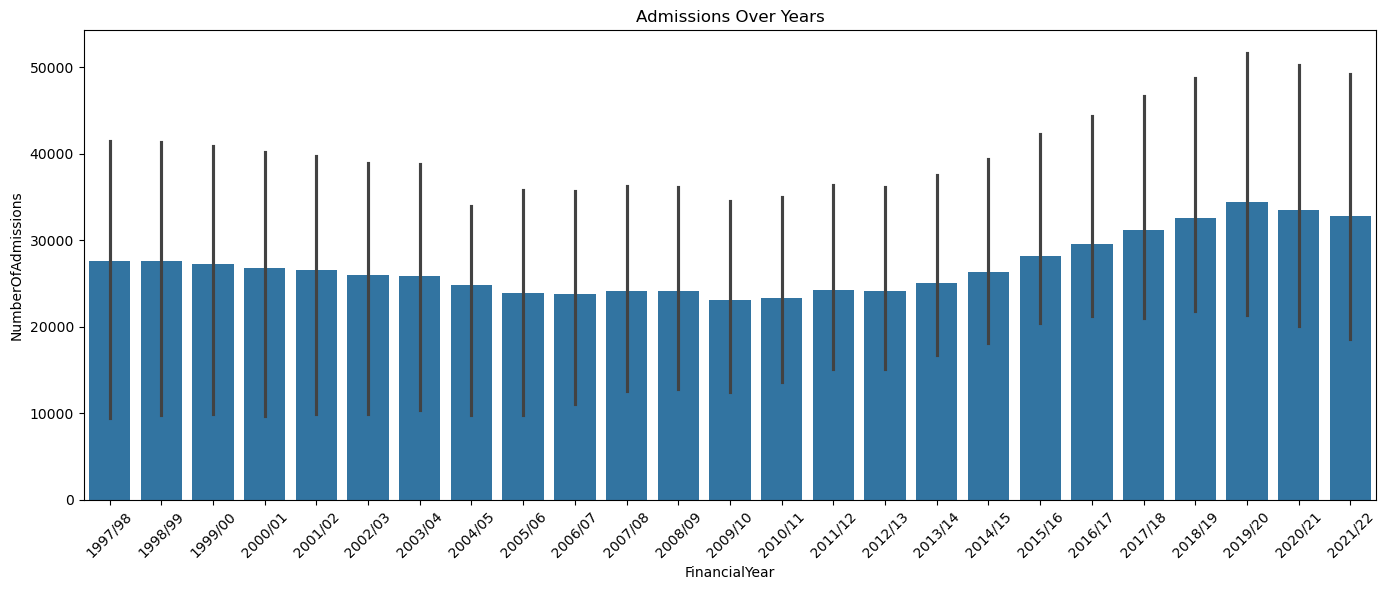

In [47]:
#barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='FinancialYear', y='NumberOfAdmissions', data=df)
plt.xticks(rotation=45)
plt.title("Admissions Over Years")
plt.tight_layout()
plt.show()
#📅 Benefit: Trends over time – helps link external factors (e.g., COVID-19 spike).